In [5]:
#Importação das bibliotecas usadas e outras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Leitura dos dados provindos de planilhas fornecidas pela ANS(Agência Nacional
#de Saúde Suplementar) e pelo IBGE
des=np.matrix(pd.read_excel("desemprego.xlsx",index_col=0))[2]
planos=np.matrix(pd.read_excel("ANS.xls",sheet_name='tab 1 +',index_col=0))
pop=np.matrix(pd.read_excel("populacao (1).xlsx",index_col=0))
pib=np.matrix(pd.read_excel("pib-brasil.xls",sheet_name="Planilha1",index_col=0))
sex_idade=np.matrix(pd.read_excel("sexo_idade.xlsx",sheet_name="Planilha1"))
planos_si=np.matrix(pd.read_excel("ANS.xls",sheet_name='tab 5',index_col=0))
planos_est=np.matrix(pd.read_excel("ANS.xls",sheet_name='tab 4',index_col=0))

In [7]:
#Criação de listas com os dados de população, planos de saúde e anos.
des=des[0,11::12]
dimdes=des.shape
npop=[]
for i in range(dimdes[1]):
    npop+=[pop[3,i]]
ndes=[]
for i in range(dimdes[1]-1):
    ndes+=[((float(des[0,i+1])*npop[i]/float(des[0,i])/npop[i+1])-1)/10]

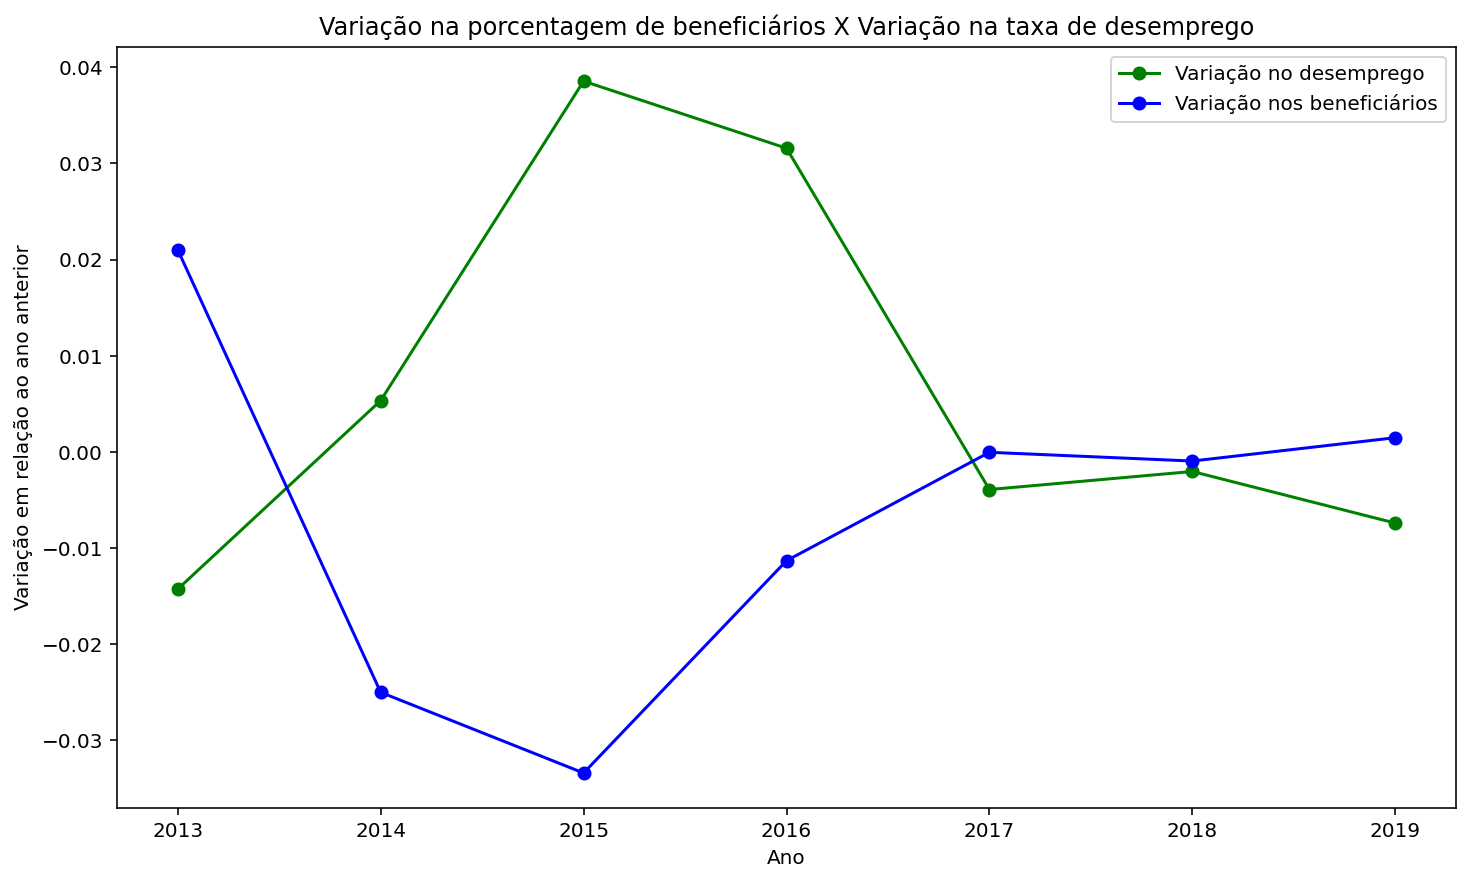

In [8]:
#Criação de lista com os dados de desemprego e de gráfico comparando a variação
#do desemprego com a da porcentagem da população beneficiária de planos.
nplanos=[]
for i in range(26-len(ndes),26):
    nplanos+=[(planos[i+1,0]/planos[i,0])-1]
anos=[]
for i in range(len(ndes)):
    anos+=[str(2013+i)]
plt.plot(anos,ndes, color='green', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na porcentagem de beneficiários X Variação na taxa de desemprego')
plt.legend(('Variação no desemprego','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

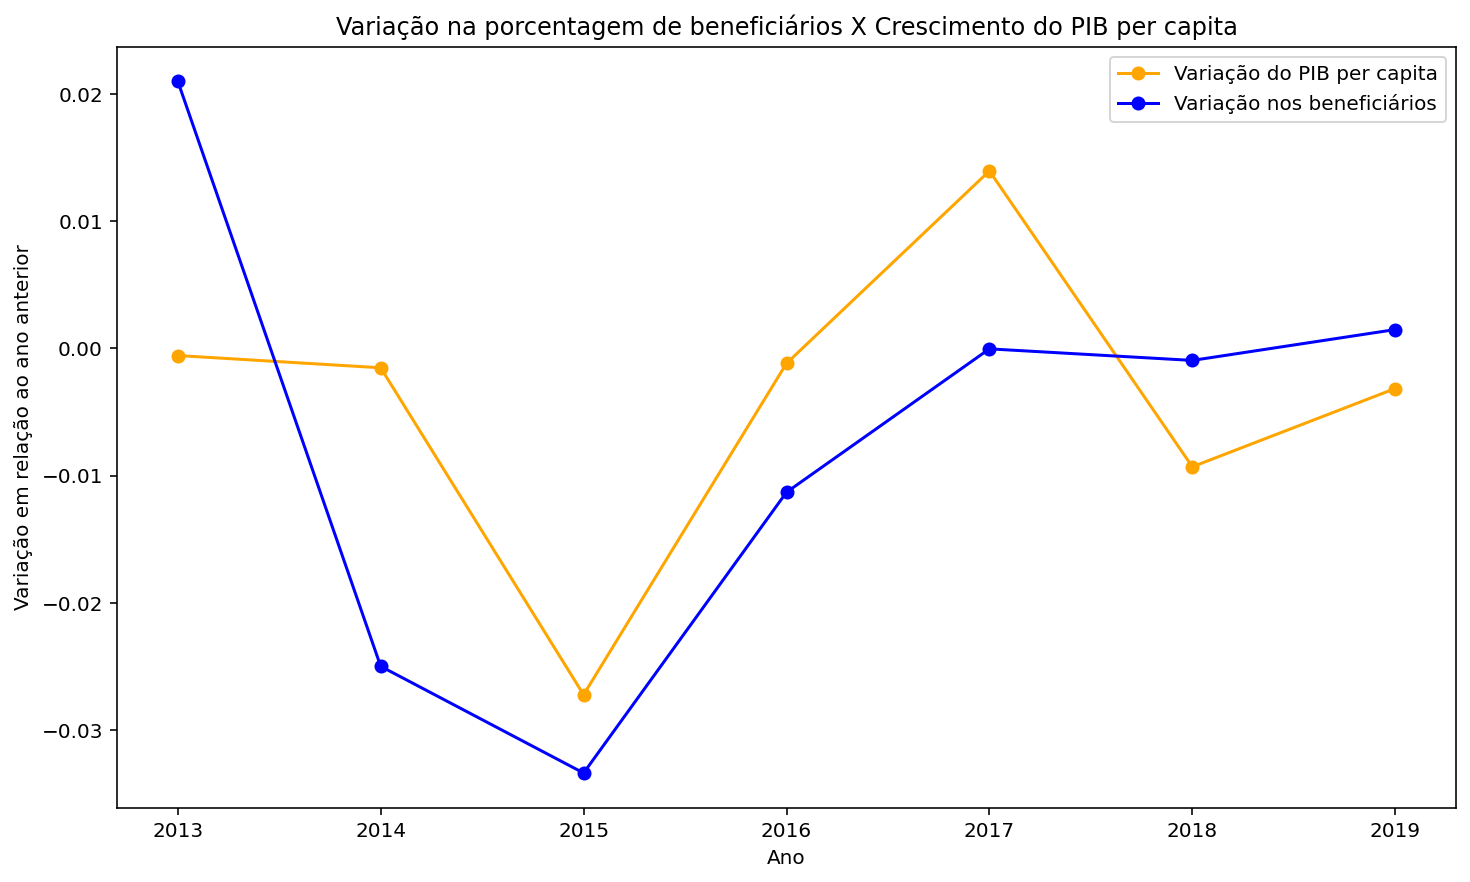

In [9]:
#Criação de lista com os dados de PIB per capita e de gráfico comparando a
#variação nesse PIB com a da porcentagem da população beneficiária de planos.
pib=pib[0,55:63]
npib=[]
for i in range(7):
    npib+=[((pib[0,i+1]/pib[0,i])-1)/10]
plt.plot(anos,npib, color='orange', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na porcentagem de beneficiários X Crescimento do PIB per capita')
plt.legend(('Variação do PIB per capita','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

In [10]:
#Criação de listas com os dados da aderência de homens e mulheres de diferentes
#faixas etárias a planos de saúde
M_planos=[]
F_planos=[]
M_col=[]
F_col=[]
M_ind=[]
F_ind=[]
idades=[]
for i in range(9):
    M_planos+=[planos_si[7+i,2]/sex_idade[i,1]]
    F_planos+=[planos_si[7+i,1]/sex_idade[i,2]]
    M_col+=[planos_si[18+i,2]/sex_idade[i,1]]
    F_col+=[planos_si[18+i,1]/sex_idade[i,2]]
    M_ind+=[planos_si[29+i,2]/sex_idade[i,1]]
    F_ind+=[planos_si[29+i,1]/sex_idade[i,2]]
    if i<8:
        idades+=[str(10*i)+"a"+str(10*i+9)]
    else:
        idades+=["80 ou mais"]

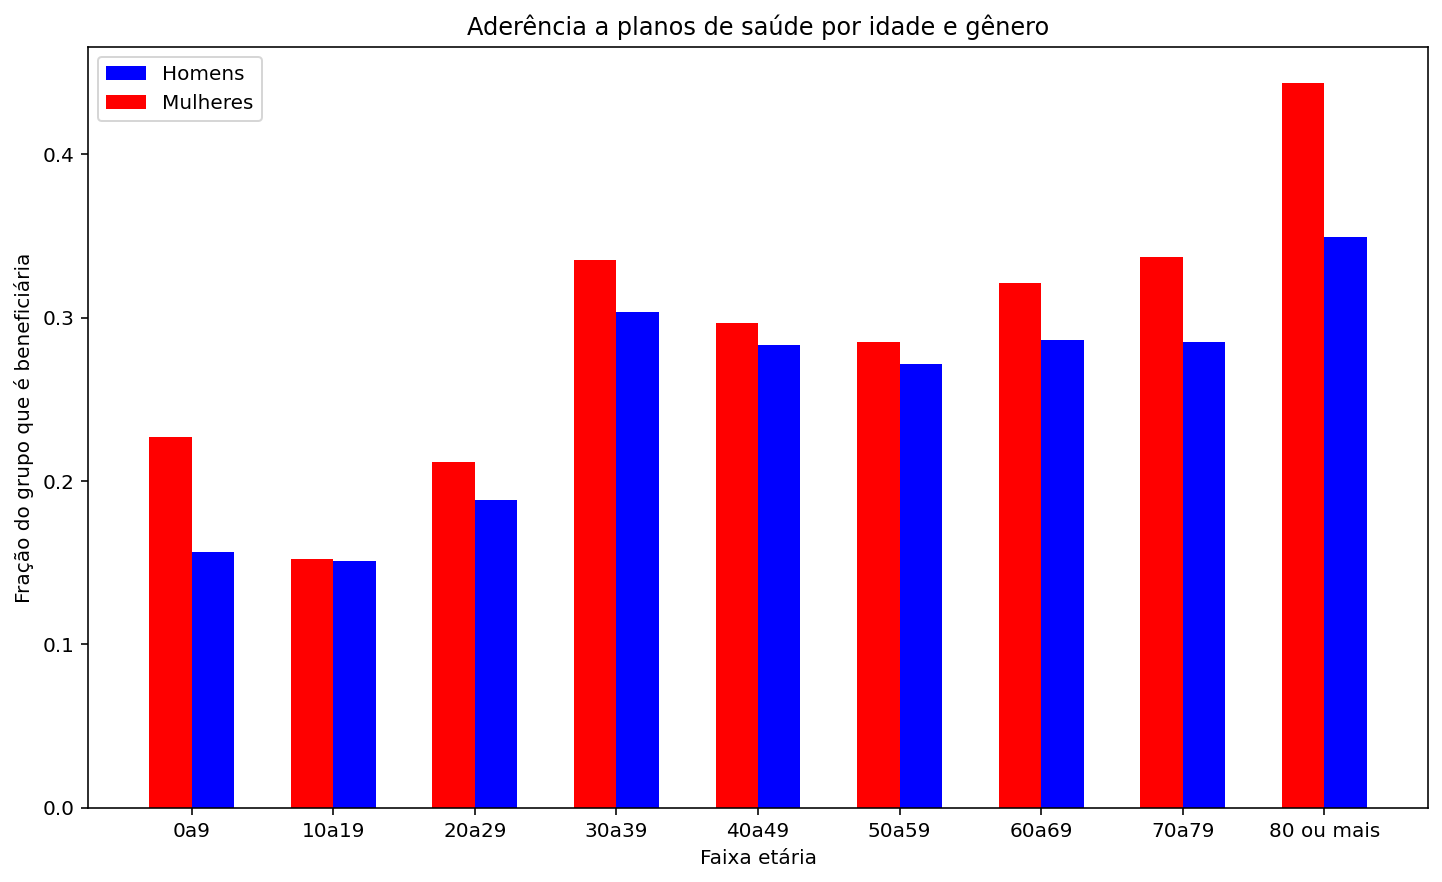

<Figure size 72x144 with 0 Axes>

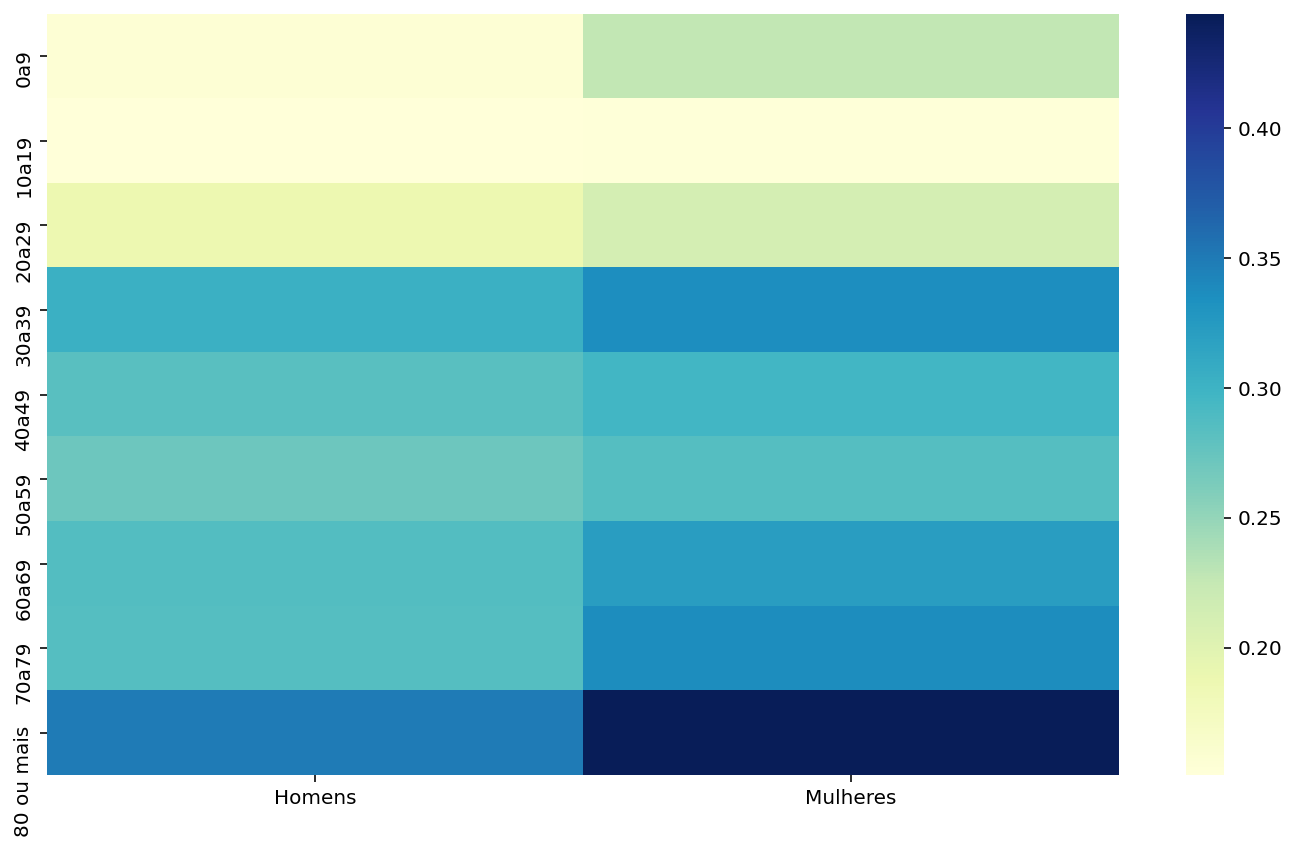

In [11]:
#Adesão a planos
plt.bar(idades, M_planos, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_planos, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.figure(figsize=[1,2])
plt.show()

#Mapa de calor
x=[]
for i in range(len(M_planos)):
    x+=[[M_planos[i],F_planos[i]]]
x=np.matrix(x)
ax=sns.heatmap(x,cmap="YlGnBu",yticklabels=idades,xticklabels=['Homens','Mulheres'])

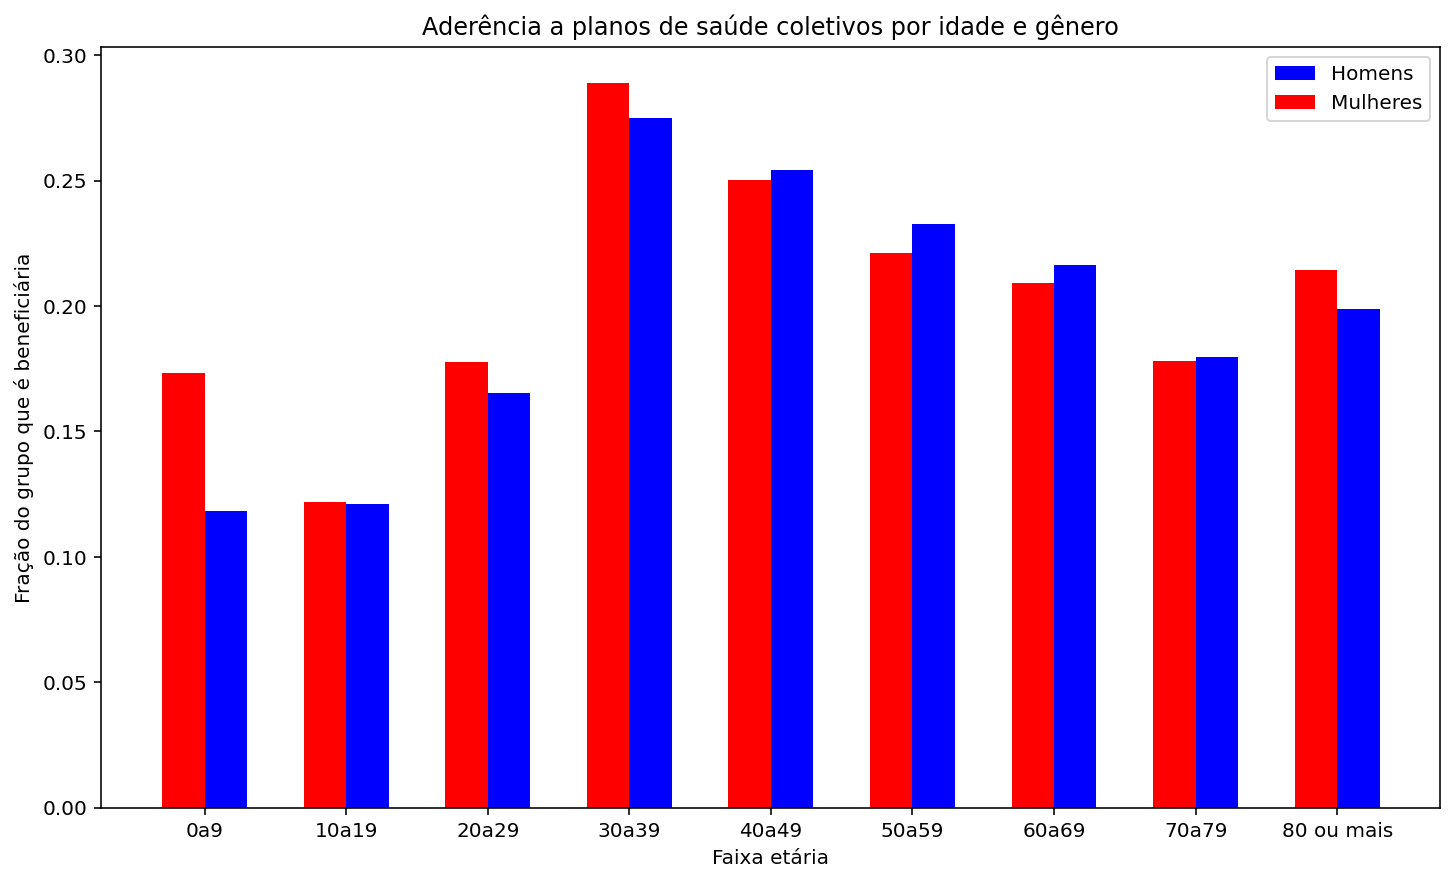

In [12]:
#Adesão a planos coletivos
plt.bar(idades, M_col, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_col, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde coletivos por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()

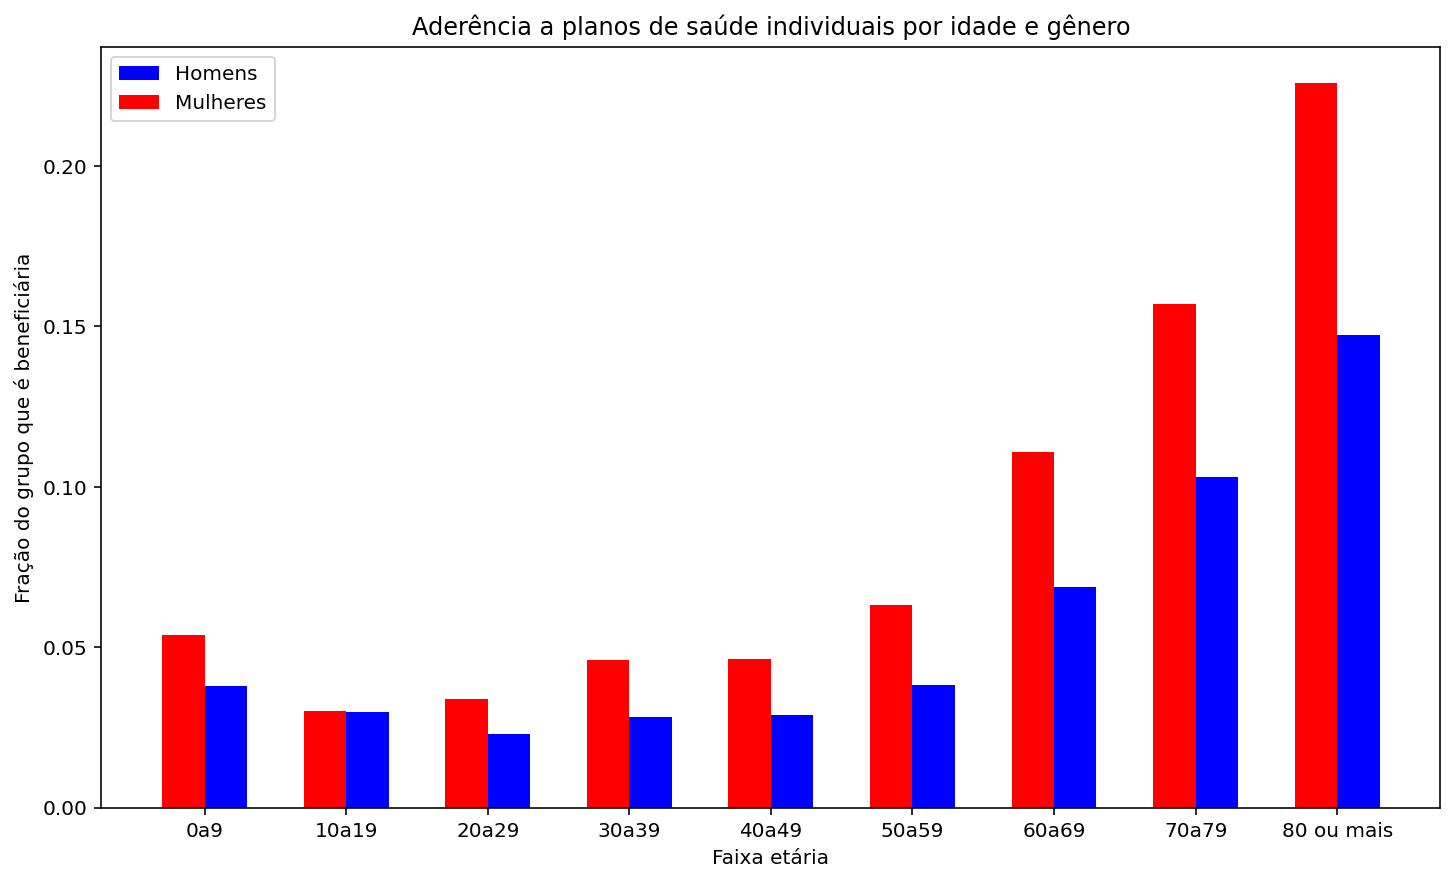

In [13]:
#Adesão a planos individuais
plt.bar(idades, M_ind, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_ind, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde individuais por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()